## Import Libraries

In [99]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDOneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Add more classification lib here
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import pickle

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [100]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

In [102]:
numCol = ['tenure',	'monthly_charges',	'total_charges']
for nCol in numCol:
    exploreNumCol(df, nCol)
    print('')

Mean tenure = 32.42
Median tenure = 29.0
Modus tenure = 1
Min tenure = 1
Max tenure = 72
Skewness tenure = 0.23773083190513133, data distribution is normal

Mean monthly_charges = 64.80
Median monthly_charges = 70.35
Modus monthly_charges = 20.05
Min monthly_charges = 18.25
Max monthly_charges = 118.75
Skewness monthly_charges = -0.22210292770166232, data distribution is normal

Mean total_charges = 2283.30
Median total_charges = 1397.475
Modus total_charges = 20.2
Min total_charges = 18.8
Max total_charges = 8684.8
Skewness total_charges = 0.9616424997242504, data distribution is not normal



> Handling outlier sudah tak kerjakan di data_engineer --GILANG

In [103]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

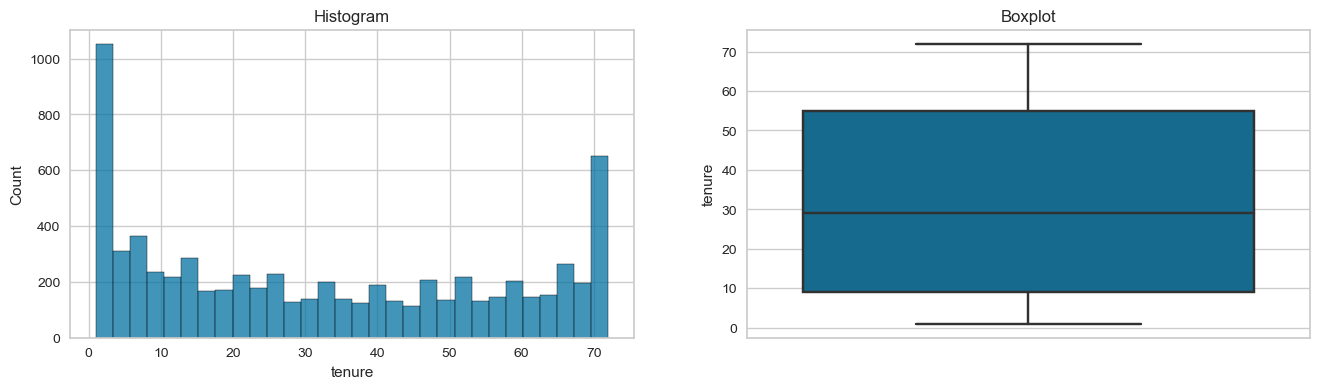

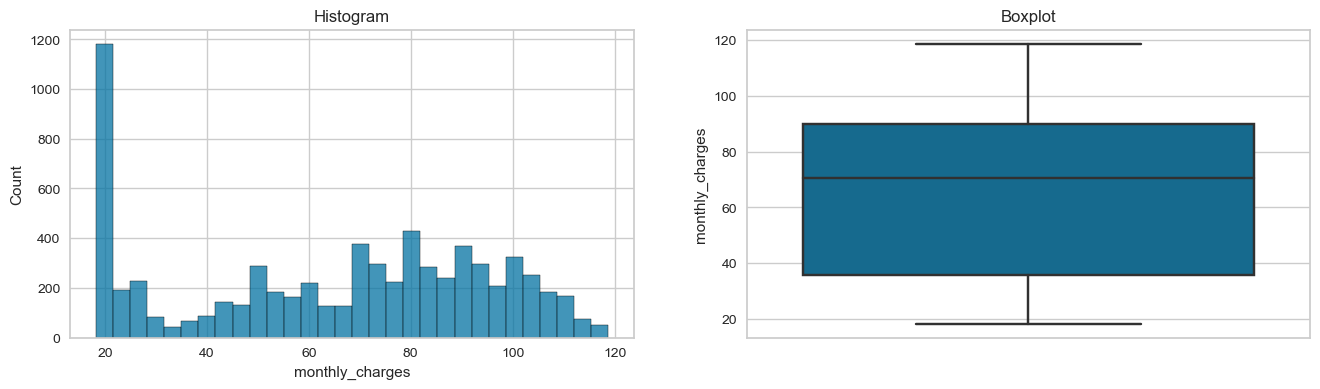

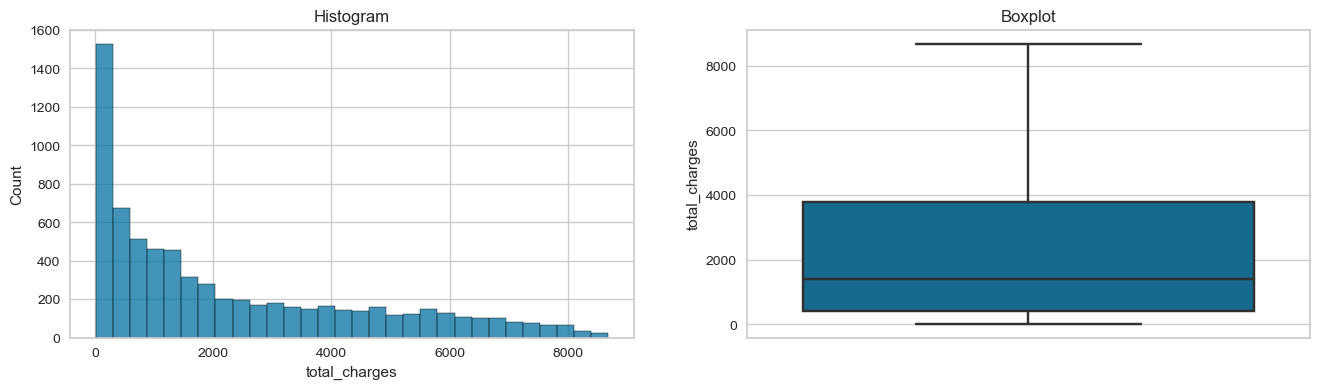

In [104]:
numCol = ['tenure',	'monthly_charges',	'total_charges']
for nCol in numCol:
    diagnostic_plots(df, nCol)

In [105]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [106]:
catCol = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method']

# Split Features

In [119]:
X = df.drop('churn', axis =  1)
y = df['churn']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

print('Train Size :',X_train.shape)

print('Test Size :',X_test.shape)

X_train

Train Size : (5625, 19)
Test Size : (1407, 19)


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
4742,Male,No,No,No,9,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,One year,No,Mailed check,39.55,373.00
1894,Male,No,No,No,17,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.95,1612.20
3322,Male,No,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,No,Electronic check,95.30,6273.40
5117,Female,No,Yes,No,11,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,1078.90
1783,Female,No,Yes,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.60,1134.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,Male,No,No,No,15,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),87.75,1242.20
3606,Male,No,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.70,1558.70
5704,Male,Yes,No,No,49,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),81.35,4060.90
6637,Male,No,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75


# Split Columns

In [121]:
X_train_num = X_train[numCol]
X_train_cat = X_train[catCol]

X_test_num = X_test[numCol]
X_test_cat = X_test[catCol]

# Feature Scaling

In [122]:
skewed_transformer = Pipeline([
    ('standard', StandardScaler())
])

# Feature Encoding

In [123]:
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder())
])

# Merge Data

In [124]:
preprocessor = ColumnTransformer(transformers=[
    ('skewed', skewed_transformer, numCol),
    ('cat', categorical_transformer, catCol)
])

# Model Definition

In [125]:
pipe_logreg = Pipeline([('preprocessor',preprocessor),('classifier',LogisticRegression())])
pipe_knn = Pipeline([('preprocessor',preprocessor),('classifier',KNeighborsClassifier())])
pipe_svm = Pipeline([('preprocessor',preprocessor),('classifier',SVC())]) 
pipe_dt = Pipeline([('preprocessor',preprocessor),('classifier',DecisionTreeClassifier())])
pipe_rf = Pipeline([('preprocessor',preprocessor),('classifier',RandomForestClassifier())])

# Model Training

In [126]:
pipe_logreg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', LogisticRegression())])

In [127]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', KNeighborsClassifier())])

In [128]:
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', SVC())])

In [129]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', DecisionTreeClassifier())])

In [130]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies',
                                                   'contract',
                                                   'paperless_billing',
                                                   'payment_method'])])),
                ('classifier', RandomForestClassifier())])

# Model Evaluation

In [140]:
def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return precision_score(y, y_pred, pos_label='Yes')

## Logistic Regression Evaluation

In [141]:
y_pred_train_logreg = pipe_logreg.predict(X_train)
y_pred_test_logreg = pipe_logreg.predict(X_test)

y_pred_train_logreg

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [144]:
print('Precision - Train : ', performance_check(pipe_logreg, X_train, y_train))
print('Precision - Test  : ', performance_check(pipe_logreg, X_test, y_test))

Precision - Train :  0.6584786053882726
Precision - Test  :  0.6497005988023952


## KNN Evaluation

In [145]:
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)

y_pred_train_knn

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [146]:
print('Precision - Train : ', performance_check(pipe_knn, X_train, y_train))
print('Precision - Test  : ', performance_check(pipe_knn, X_test, y_test))

Precision - Train :  0.7196467991169978
Precision - Test  :  0.5305039787798409


## SVM Evaluation

In [147]:
y_pred_train_svm = pipe_svm.predict(X_train)
y_pred_test_svm = pipe_svm.predict(X_test)

y_pred_train_svm

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [148]:
print('Precision - Train : ', performance_check(pipe_svm, X_train, y_train))
print('Precision - Test  : ', performance_check(pipe_svm, X_test, y_test))

Precision - Train :  0.7115902964959568
Precision - Test  :  0.6598639455782312


## DecisionTree Evaluation

In [149]:
y_pred_train_dt = pipe_svm.predict(X_train)
y_pred_test_dt = pipe_svm.predict(X_test)

y_pred_train_dt

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [150]:
print('Precision - Train : ', performance_check(pipe_dt, X_train, y_train))
print('Precision - Test  : ', performance_check(pipe_dt, X_test, y_test))

Precision - Train :  0.9986531986531987
Precision - Test  :  0.4679334916864608


## RandomForest Evaluation

In [151]:
y_pred_train_rf = pipe_svm.predict(X_train)
y_pred_test_rf = pipe_svm.predict(X_test)

y_pred_train_rf

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [152]:
print('Precision - Train : ', performance_check(pipe_rf, X_train, y_train))
print('Precision - Test  : ', performance_check(pipe_rf, X_test, y_test))

Precision - Train :  0.9966465459423206
Precision - Test  :  0.6146496815286624
